# Part 1: Data Preprocessing

We are using data from Kaggle to conduct research on determining the accuracy of predicting whether a patient's breast cancer is malignant or benign.

Data Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


## Importing Libraries and Dataset

We will begin by importing the necessary libraries.

In [306]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now that we have imported the necessary libraries, we can move on to reading in our dataset from the 'data.csv' file. By using the `pd.read_csv` function, we are able to read in the file and store it in a Pandas dataframe called `dataset`. 

After reading in the file, it's always a good idea to take a quick look at the head of the dataset to get a sense of the data we're working with. By using the `.head()` function, we can display the first five rows of the dataframe, giving us a glimpse of the data structure and values.

In [307]:
# Reading CSV file
dataset = pd.read_csv('data.csv')

# Looking at head of dataset
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Exploration

With the dataset now read into a Pandas dataframe, we can check the dimensions of the data by using the `.shape` attribute. This will give us a tuple of the number of rows and columns in the dataframe, allowing us to quickly verify the size of the dataset and ensure that all the data has been correctly loaded.

In [308]:
# Showing the dimension of the dataframe
dataset.shape

(569, 33)

We see that there are 569 observations and 33 variables (one of which is the predictor).

In order to get a more detailed understanding of the dataset, we can use the `.info()` method. This method provides a concise summary of the dataframe, including the number of non-null values in each column, the data type of each column, and the memory usage of the dataframe. This information can be helpful in identifying any missing values, mismatched data types, or any other issues that may need to be addressed during the preprocessing stage.

In [309]:
# Checking the information on the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Most of these are in fact numerical data, with the only categorical one being the `diagnosis` variable (which in our case, we will use as our predictor).

In [310]:
# Checking the categorical features in the dataset
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [311]:
# Checking for the number of categorical features
len(dataset.select_dtypes(include='object').columns)

1

In [312]:
# checking for numerical features in the dataset
dataset.select_dtypes(include=('float64','int64')).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [313]:
# Checking for the number of numerical features
len(dataset.select_dtypes(include=('float64','int64')).columns)

32

We confirmed that `diagnosis` variable is the only categorical variable with entries being either M (malignant) or B (benign).

We also confirmed all other variables are numerical.

Now, we'll look a little at the satistical summary of the dataset. This information can be useful in understanding the distribution of the data and detecting any outliers or extreme values that may need further investigation.

In [314]:
# Getting the statistical summary of the dataset
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Nothing seems to be out of the ordinary, except the last column, the `Unnamed: 32` variable, so next we'll look at handling any missing data.

## Handling Missing Data

We're going to see whether we can find any missing data, and then see what we can do with those missing values

In [315]:
# Checking if there are in fact any missing values or not
dataset.isnull().values.any()

True

We found missing values in our dataset, so let's see how many there are.

In [316]:
# Checking how many missing values we have
dataset.isnull().values.sum()

569

Which variables contain the missing values?

In [317]:
# Which columns have the missing values
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

Seems like the variable named `Unnamed: 32` has all the missing values, so let's see how many values aren't null in that variable.



In [318]:
# How many values in this column are not null values
dataset['Unnamed: 32'].count()

0

Since the entire variable column is only nulls, it will be safe to say we can drop this variable from our dataset.

In [319]:
# Dropping the null variable
dataset = dataset.drop(columns='Unnamed: 32')

We'll just check now that the column was indeed dropped by checking the shape of the dataset.

In [320]:
dataset.shape 

(569, 32)

We see that now we have 32 columns, instead of 33, so the null column has been dropped.

We should just confirm that there are no more missing/null values in our dataset.

In [321]:
# Checking if any null values exist in the dataset
dataset.isnull().values.any()

False

## Handling Categorical Data

We know that the `diagnosis` variable is categorical, so let's explore more of what that data consists of.

In [322]:
# How many unique values are there in the diagnosis variable
dataset['diagnosis'].nunique()

2

In [323]:
# What are the values
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

We see that we have M (malignant) and B (benign) values for each observation. 

Next, since this data is categorical, we're looking at performing One-Hot Encoding.

In machine learning, it is often necessary to convert categorical variables into numerical ones in order to feed them into a model. \

One commonly used method for doing this is One-Hot Encoding, which creates a new binary column for each unique category in a categorical variable. In this code, we are using the `pd.get_dummies` function to perform One-Hot Encoding on the dataset. By setting `drop_first=True`, we are dropping the first binary column for each categorical variable, to avoid the issue of perfect multicollinearity, where the columns are perfectly correlated with one another.

In [324]:
# One-Hot Encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [325]:
# Checking to make sure it worked
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


We see the `diagnosis` variable is now gone, and a new variable is added, `diagnosis_M` , with binary values 1 if the cancer is malignant, and 0 if the cancer is benign.

## Countplot


The `sns.countplot` function from the Seaborn library allows us to visualize the distribution of a categorical variable. In this code, we are plotting the distribution of the binary variable `diagnosis_M`, which represents the diagnosis of the breast cancer as either malignant (1) or benign (0). 

The `count` label provides a label for the y-axis, which shows the count of instances in each class. This plot can help us get a sense of the balance or imbalance in the classes, which is important in evaluating the performance of a machine learning model and determining if any further steps, such as oversampling or undersampling, may be necessary.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis_M', ylabel='count'>

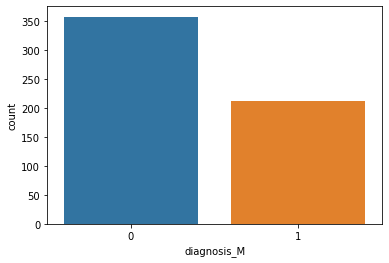

In [326]:
# Checking count of benign (0) and malignant (1)
sns.countplot(dataset['diagnosis_M'], label='count')

We can see the blue bar indicates the 0 (benign) values, and the orange bar indicates the 1 (malignant) values.

We also check the exact amount of these values.


In [327]:
# Benign Values
(dataset.diagnosis_M == 0).sum()

357

In [328]:
# Malignant values
(dataset.diagnosis_M == 1).sum()

212

## Correlation Matrix and Heatmap

A correlation matrix is a table that shows the correlation between multiple variables. In our case, we are interested in exploring the relationship between the different features and the target variable `diagnosis`. 

By creating a correlation matrix and visualizing it as a heatmap, we can quickly see which features are most highly correlated with the target variable, and which features may not be as useful in our analysis. 

This information can help us in selecting a subset of features for building our machine learning model, and can also give us insights into the relationships between the variables in the dataset.

In [329]:
# Creating a new temporary dataset where we drop the predictor variable
dataset_temp = dataset.drop(columns='diagnosis_M')

In [330]:
# Checking to make sure the variable has been dropped
dataset_temp.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We confirm that the `diagnosis_M` variable has been dropped, and now we look to create a bar plot to visualize the correlation between each feature in the dataset and the target variable, diagnosis_M. 

By plotting the correlation values in this way, we can see at a high level which features are most strongly related to the target variable, allowing us to determine which features are the most important for our analysis. 

This visualization provides a clear and easily interpretable representation of the relationships between the features and target, helping us to make informed decisions about how to proceed with our analysis.

<AxesSubplot:title={'center':'Correlated with diagnosis_M'}>

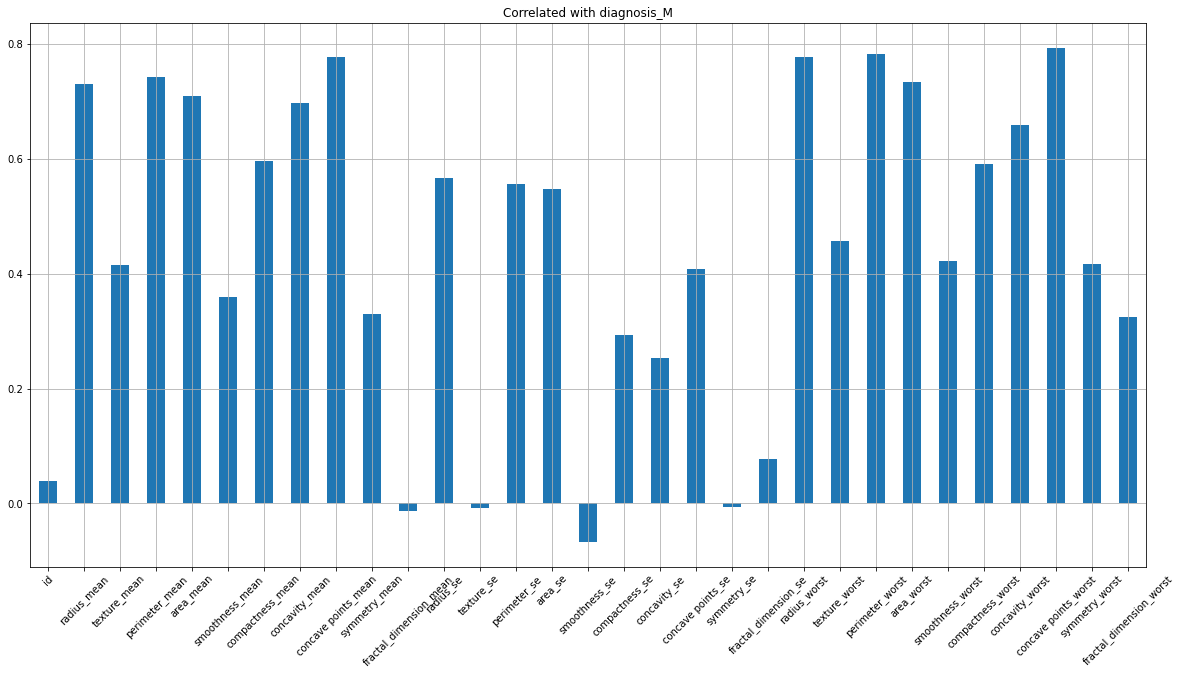

In [331]:
# Creating a bat plot with correlations to diagnosis_M
dataset_temp.corrwith(dataset['diagnosis_M']).plot.bar(
    figsize = (20,10), title = 'Correlated with diagnosis_M', rot = 45, grid = True
)

This bar plot visualizes the correlation between each feature in the dataset and the target variable diagnosis_M. 

Features with a high correlation to diagnosis_M are represented by the bars with larger heights, while those with lower correlation are represented by smaller bars. 

The height of each bar represents the strength of the correlation, with positive correlations (features increasing as the target variable increases) represented by bars on the right side of the plot and negative correlations (features decreasing as the target variable increases) represented by bars on the left side. 

By identifying the features with high correlation to the target variable, we can gain insights into which features are most relevant for predicting the diagnosis of breast cancer.

We'll now look at creating a correlation matrix.

In [332]:
# Creating a correlation matrix
corr = dataset.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


Analyzing a large set of numerical data for correlation with like this can be challenging, as it can be difficult to make sense of the patterns and relationships within the data. 

To simplify this process and make it easier to identify correlations, we will create a heatmap. A heatmap is a graphical representation of data where individual values are represented as colors, making it easier to spot trends and relationships. 

By creating a heatmap of our dataset, we can quickly visualize the correlations between the different features, allowing us to gain insights into which features are most important for our analysis. 

This graphical representation provides a powerful tool for exploring and understanding complex datasets, making it a valuable addition to our data preprocessing pipeline.

<AxesSubplot:>

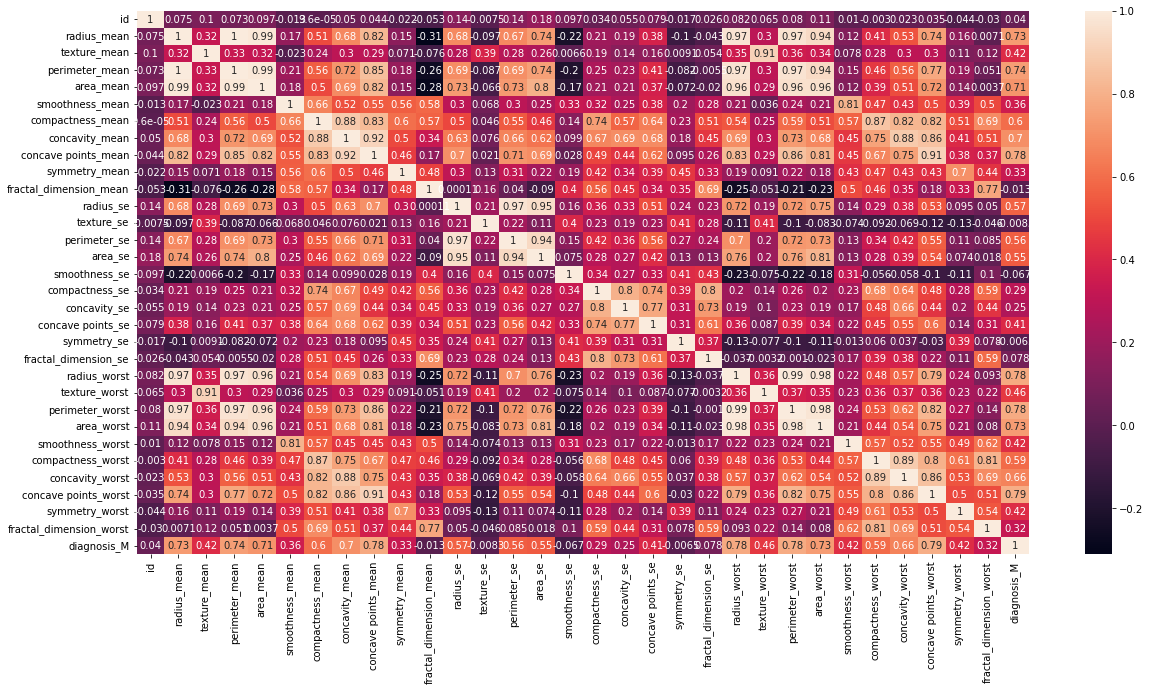

In [333]:
# Creating a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

In this heatmap, we can observe that the lighter colors indicate a strong correlation between two features, while the darker colors indicate a weaker correlation.

By understanding the correlations between the features and the target variable, we can now move forward with preparing the data for analysis. One crucial step in this process is splitting the dataset into two parts: a training set and a testing set. 

The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. This step is important because it helps to prevent overfitting, where the model becomes too closely tied to the training data and does not generalize well to new, unseen data. 

By splitting the data into training and testing sets, we can ensure that our model is accurate and reliable, making it a crucial step in the data preprocessing pipeline.

## Splitting the Data into Training and Testing Sets

We'll first begin by creating a new variable x that contains the input features for our machine learning model. The `iloc` method is used to select a subset of columns from the dataset, which are then converted to a Numpy array using the values attribute. 

In this case, we are selecting all rows and all columns except for the first and last columns, which represent the unique ID of each sample and the target variable (`diagnosis_M`) respectively. 

By selecting only the relevant features, we can reduce the complexity of the data and improve the performance of our machine learning model. The resulting x variable can then be used as input to our model training process.

We'll also use `iloc` function to create a y vector with `diagnosis_M` variable for our dependent variable. 

In [334]:
# Selecting matrix of features / independent variables
x = dataset.iloc[:, 1:-1].values

In [335]:
# Confirming rows and columns saved in x
x.shape

(569, 30)

In [336]:
# Predictor variable / dependent variable
y = dataset.iloc[:, -1].values

In [337]:
# Confirming this is only 1 column with 569 entries
y.shape

(569,)

We have an x matrix with features, and a y matrix with our predictor, so let's split our data now.

First, we'll import the `train_test_split` function from the `model_selection` module of the scikit-learn library. 

This function is commonly used to split the dataset into training and testing sets, allowing for the creation of separate datasets to train and test a machine learning model. 

By using `train_test_split`, we can randomly split the dataset into two separate parts, one for training and one for testing, with the ability to specify the proportion of the data to be used for each part. 

The resulting datasets can then be used for training and testing our machine learning model.

In [338]:
# Importing train_test_split function
from sklearn.model_selection import train_test_split

The following code uses the train_test_split function to split the input features and target variable into training and testing sets. The function takes four parameters:



*   x: the input features or independent variables.
*   y: the target variable or dependent variable.
*   test_size: the proportion of the dataset to include in the testing set, which is set to 0.2 or 20% in this case.
*   random_state: an optional parameter that allows us to specify the random seed used for splitting the data, ensuring that the results are reproducible.




The function returns four variables, which represent the training and testing sets for the input features and target variable respectively. These variables are assigned to x_train, x_test, y_train, and y_test, which can then be used to train and evaluate our machine learning model. By splitting the data into separate training and testing sets, we can evaluate how well the model is able to generalize to new, unseen data.

In [339]:
# Splitting data with function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [340]:
# Checking x_train dimensions
x_train.shape

(455, 30)

In [341]:
# Checking x_test dimensions
x_test.shape

(114, 30)

In [342]:
# Checking y_train dimensions
y_train.shape

(455,)

In [343]:
# Checking y_test dimensions
y_test.shape

(114,)

## Feature Scaling


We will now import the `StandardScaler` class from the `preprocessing` module of the scikit-learn library. This class is used for feature scaling, which is an important preprocessing step in many machine learning algorithms.

`StandardScaler` is a normalization technique that scales the input features so that they have zero mean and unit variance. This helps to center the data and ensure that features with different scales are treated equally. `StandardScaler` works by calculating the mean and standard deviation of each feature in the training set, and then subtracting the mean and dividing by the standard deviation for each feature. The resulting scaled features have a mean of 0 and a standard deviation of 1.

In [344]:
# Importing StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [345]:
# Initializing an instance of StandardScaler 
sc = StandardScaler()

We are now going to apply feature scaling to the training and testing datasets using the StandardScaler instance that we previously imported from the scikit-learn library.



*   `sc.fit_transform(x_train)` calculates the mean and standard deviation of each feature in x_train and scales the features accordingly. The resulting scaled values are stored in `x_train`.
*   `sc.transform(x_test)` applies the same transformation to the testing set `x_test`. The mean and standard deviation of each feature are calculated based on the training set, so the transformation ensures that the same scaling is applied to both the training and testing sets.







By scaling the features in both the training and testing sets, we ensure that the features are on the same scale and that they have zero mean and unit variance. This helps to prevent bias in the model and improve the accuracy of the machine learning algorithm.

In [346]:
# Applying transformations
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [347]:
# Checking that the x_train variable has been transformed
x_train

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

In [348]:
# Checking that the x_test variable has been transformed
x_test

array([[ 0.1318529 , -1.22289689,  0.22619275, ..., -0.07497962,
        -0.09827233,  0.50779424],
       [-0.28874137, -0.15799931, -0.26406701, ...,  1.38865765,
         1.72716717,  2.06060854],
       [-0.34961686, -0.75871076, -0.3778201 , ..., -0.15264201,
         0.84251802,  0.73392057],
       ...,
       [-1.43458406, -0.46063046, -1.35313261, ...,  0.88385214,
         2.28517664,  2.03655255],
       [ 0.08757982, -0.00327061,  0.06717876, ..., -0.29691482,
        -0.70391675, -0.54164842],
       [-0.11995025, -0.81104547, -0.16833819, ..., -1.23513619,
        -1.74508076, -0.9343625 ]])

We can see that both `x_train` and `x_test` have been transformed, so now we are done with the data preprocessing step.

# Part 2: Building the Model

Choosing an appropriate machine learning algorithm is an important step in building a predictive model. In this case, the intuition is that two different classification algorithms, logistic regression and random forest classifier, could be suitable for this dataset.

* **Logistic regression** is a simple but powerful linear model that can be used to predict binary outcomes. It is easy to implement, interpret and has good performance on small datasets. Since our target variable is binary (diagnosis is either malignant or benign), logistic regression could be a good choice for this task.

* **Random forest**, on the other hand, is an ensemble learning algorithm that combines multiple decision trees to create a more accurate and robust model. It can handle a mix of categorical and numerical features, and can deal with missing values and outliers. It also tends to perform well on high-dimensional datasets with many features, which is the case for our breast cancer dataset.

By applying both of these algorithms, we can compare their performance and select the one that gives the best accuracy and precision in predicting the diagnosis of breast cancer.

## 1) Logistic Regression

We'll first import `LogisticRegression` class from the `linear_model` module of the scikit-learn library. Logistic regression is a supervised learning algorithm used for binary classification problems, where the target variable takes only two values, 0 and 1.

In our case, we have a binary classification problem, where the target variable is either malignant or benign. We can use the `LogisticRegression` class to train a model on our breast cancer dataset and predict whether the cancer is malignant or benign.

In [349]:
# Importing LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [350]:
# Initializing an instance of LogisticRegression
classifier_lr = LogisticRegression(random_state=1)

In [351]:
# Fitting the training data to our logistic regression
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=1)

After training the logistic regression model on the training set, we can use the `predict()` method of the classifier object to generate predictions on the test set. The `predict()` method takes the test set as input and returns the predicted class labels for each sample in the test set.

Once we have the predicted class labels for the test set, we can compare them to the actual class labels of the test set to evaluate the performance of our logistic regression model. 

In [352]:
# Calculating predicted values from our test dataset using our logistic model
y_pred = classifier_lr.predict(x_test)

In following code, we are importing several functions from the `sklearn.metrics` module, which will allow us to evaluate the performance of our machine learning models.

* `accuracy_score`: computes the accuracy of the predicted labels compared to the true labels.

* `precision_score`: computes the precision of the predicted labels, which is the proportion of true positives among all positive predictions.

* `recall_score`: computes the recall of the predicted labels, which is the proportion of true positives among all actual positives.

* `f1_score`: computes the F1 score, which is the harmonic mean of precision and recall.

* `confusion_matrix`: computes a confusion matrix, which is a table that summarizes the performance of a binary classification model by counting the number of true positives, true negatives, false positives, and false negatives.

We will use these functions to evaluate the performance of our logistic regression and random forest classifier models.

In [353]:
# Importing all classes needed from sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [354]:
# Initializing metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [355]:
# Creating a dataframe for our results
lr_results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [356]:
# Printing the results dataframe
lr_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.973684,0.963855,0.97561,0.952381


This table presents the results of evaluating our logistic regression model, which includes the accuracy, F1 score, precision, and recall metrics. We can observe that all of the metrics are high, with values greater than 0.95.

Therefore, these high values suggest that our logistic regression model is performing well in predicting the class labels of the test set.

We'll also look at a confusion matrix next.

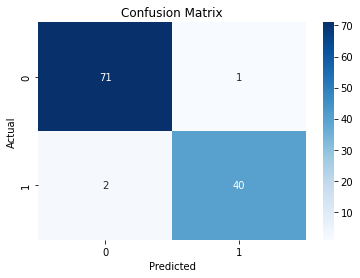

In [357]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In the case of the confusion matrix printed in the code snippet, we can see that there are two classes: 0 (benign) and 1 (malignant) and the matrix shows the number of true positive (TP), true negative (TN), false positive (FP) and false negative (FN) predictions made by the model.

Specifically, the confusion matrix shows that 71 cases were correctly predicted to be 'B' (TP), 40 cases were correctly predicted to be 'M' (TN), 1 case was incorrectly predicted to be 'B' when it was actually 'M' (FP) and 2 cases were incorrectly predicted to be 'M' when they were actually 'B' (FN). This information can be used to calculate various performance metrics of the classification model.

### Cross-Validation

Cross-validation is a technique used to evaluate machine learning models and to assess their performance in a more reliable way. 

It helps to prevent overfitting, which is when the model performs very well on the data it was trained on but poorly on new, unseen data. 

Cross-validation involves dividing the data into several subsets, training the model on different combinations of those subsets, and evaluating the performance of the model on each of the subsets. 

By doing this, we can get a more accurate assessment of the model's performance and identify potential issues such as overfitting or underfitting.

In [358]:
# Importing cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score

Here, we are performing 10-fold cross-validation using the `cross_val_score()` function from scikit-learn.

* The estimator parameter specifies the classification algorithm that we are using, which is classifier_lr in this case.
* `X` and `y` parameters represent the training data and labels respectively.
* `cv` parameter represents the number of folds we want to use in cross-validation.

The output of the `cross_val_score()` function is an array of accuracies, where each accuracy is computed from one of the folds.

In [359]:
# Creating vector of accuracies
accuracies = cross_val_score(estimator = classifier_lr, X = x_train, y = y_train, cv = 10)

In [360]:
# Printing accuracy and standard deviation
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 97.37 %
Standard Deviation is 1.90 %


The accuracy of 97.37% indicates that our logistic regression model is performing well in classifying the breast cancer cases correctly. Moreover, the low standard deviation of 1.9% shows that our model's performance is consistent across different cross-validation folds.

After evaluating the logistic regression model, we will now start building a random forest classifier to predict breast cancer diagnosis. 

## 2) Random Forest

A random forest classifier is an ensemble learning method that combines multiple decision trees to generate a more accurate model. The model works by creating a forest of decision trees and using them to predict the class of the input data.

In [361]:
# Importing RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [362]:
# Initializing an instance of RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=1)

In [363]:
# Fitting the training data to our random forest
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

We will do the same thing as before, where we are using the `predict()` method of the classifier object to generate predictions on the test set. The `predict()` method takes the test set as input and returns the predicted class labels for each sample in the test set.

In [364]:
# Calculating predicted values from our test dataset using our random forest model
y_pred = classifier_rf.predict(x_test)

In [365]:
# Importing all classes needed from sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [366]:
# Initializing metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [367]:
# Creating a dataframe for our results
rf_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [368]:
# Appending logistic regression results and random forest results into one dataframe
results = lr_results.append(rf_results, ignore_index = True)

In [369]:
# Printing results dataframe
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.973684,0.963855,0.97561,0.952381
1,Random Forest,0.956140,0.936709,1.00000,0.880952


The table provides a comparison of the performance metrics of two different models, logistic regression and random forest, that were applied to the breast cancer dataset.

The logistic regression model achieved an accuracy of 97.37%, with high F1-score, precision, and recall values. The random forest model achieved an accuracy of 95.61%, with a lower F1-score than logistic regression but a perfect precision score and a lower recall score.

The results suggest that both models performed well on the breast cancer dataset, with the logistic regression model being slightly more accurate than the random forest model. However, the random forest model achieved perfect precision, meaning that when it classified a tumor as malignant, it was always correct, but it missed some of the actual malignant cases. The logistic regression model performed well in both precision and recall and is a good choice when both false negatives and false positives need to be minimized.

It is always a good idea to compare the performance of different models to choose the one that fits best for the problem at hand.

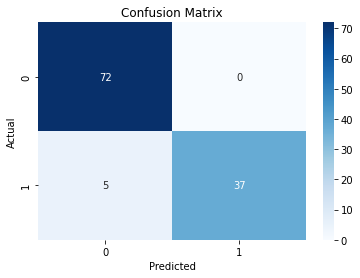

In [370]:
# Initializing a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Again, this confusion matrix shows that 72 cases were correctly predicted to be 'B' (TP), 37 cases were correctly predicted to be 'M' (TN), 0 cases was incorrectly predicted to be 'B' when it was actually 'M' (FP) and 5 cases were incorrectly predicted to be 'M' when they were actually 'B' (FN).

### Cross-Validation

To evaluate the performance of the random forest model, we will use the same evaluation metrics we used for the logistic regression. We'll also use cross-validation on the random forest model to ensure that the accuracy we obtained is reliable and not due to overfitting or underfitting.

In [371]:
# Importing cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score

In [372]:
# Creating vector of accuracies
accuracies = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)

In [373]:
# Printing accuracy and standard deviation
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 95.18 %
Standard Deviation is 2.54 %


Based on the evaluation metrics and cross-validation results, it appears that our logistic regression model performed slightly better than the random forest model. While the random forest model had a high accuracy score of 0.96, its precision score was perfect (1.00) while its recall score was relatively low (0.88), indicating that the model had a higher false negative rate. On the other hand, the logistic regression model had high scores for all evaluation metrics, with an accuracy of 0.97, a precision of 0.98, and a recall of 0.95.

In addition, the logistic regression model is a simpler model compared to the random forest model, which could potentially result in better generalization and interpretation. Therefore, we decided to finalize our model as **logistic regression.**

# Part 3: Hyperparameter Tuning

## Using RandomizedSearch on Logistic Regression

Now that we have finalized our model as logistic regression, we want to ensure that we are using the optimal hyperparameters to achieve the best performance metrics. Therefore, we will perform hyperparameter tuning to find the best combination of hyperparameters for our model.



`RandomizedSearchCV` is a method used to perform hyperparameter tuning for a machine learning model. It performs a randomized search over a specified hyperparameter space, by sampling a specified number of combinations of hyperparameters from a given distribution. 

It then fits and evaluates the model for each combination of hyperparameters using cross-validation, and returns the best combination of hyperparameters based on a specified scoring metric.

In the context of our project, we can use RandomizedSearchCV to perform hyperparameter tuning for our logistic regression model. By specifying a hyperparameter space, we can use `RandomizedSearchCV` to search for the best combination of hyperparameters for our logistic regression model, and potentially improve its performance.

In [374]:
# Importing RandomizedSearchCV from sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV

There are several hyperparameters that we can tune for a logistic regression model. In this code, we are defining a dictionary called parameters that contains different values for the hyperparameters `penalty`, `C`, `solver`, and `max_iter`. The `penalty` parameter specifies the type of regularization, `C` is the inverse of regularization strength, `solver` is the algorithm used for optimization, and `max_iter` is the maximum number of iterations for the solver to converge.

We will use `RandomizedSearchCV` to perform a random search over the hyperparameters space to find the best combination of hyperparameters for our logistic regression model.

In [375]:
# Defining parameters containing hyperparameters
parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
              }

The following code initializes a `RandomizedSearchCV` object with the following parameters:

* `estimator`: the logistic regression classifier we want to tune.
* `param_distributions`: a dictionary of hyperparameters and their potential values that we want to try out.
* `n_iter`: the number of different hyperparameter combinations we want to try out.
* `scoring`: the metric used to evaluate the performance of each combination.
* `n_jobs`: the number of CPU cores to use for parallel computation. Setting it to -1 means to use all available cores.
* `cv`: the number of folds in the cross-validation process.
* `verbose`: the level of detail to display during the search process. A higher value means more details will be shown.

In [376]:
# Initializing RanddomizedSearchCV
randomSearch = RandomizedSearchCV(estimator=classifier_lr, param_distributions=parameters, 
                                  n_iter=10, scoring='roc_auc', n_jobs=-1, cv=10, verbose=3)

In [377]:
# Executing .fit method
randomSearch.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=1),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [378]:
# Printing the best estimators from our RandomizedSearchCV
randomSearch.best_estimator_

LogisticRegression(C=1.25, random_state=1, solver='sag')

In [379]:
# Printing the best score from our RandomizedSearchCV
randomSearch.best_score_

0.9942263112141407

In [380]:
# Printing the best parameters from our RandomizedSearchCV
randomSearch.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 1.25}

The code above shows the best parameters that were obtained after performing hyperparameter tuning using RandomizedSearchCV. The best parameters obtained were: {'solver': 'sag', 'penalty': 'l2', 'C': 1.25}.

These parameters indicate that the logistic regression model should use the sag solver, the l2 penalty, and a regularization strength parameter of 1.25. These parameters were chosen based on their ability to optimize the performance of the model on the specified scoring metric (roc_auc in this case).

# Part 4: Final Model (Logistic Regression)

Once we have selected the best hyperparameters for our logistic regression model, we can proceed to create our final model using these updated parameters. This final model will be used for predicting the class labels of new data instances.

By specifying the updated hyperparameters, we can create a new instance of the logistic regression classifier that will perform better than the default logistic regression model with default hyperparameters. Therefore, we can expect that our final model will produce more accurate predictions than our previous models.

In [381]:
# Importing LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [382]:
# Initializing an instance of LogisticRegression with the best parameters
classifier = LogisticRegression(C=0.75, random_state=1, solver='liblinear')

In [383]:
# Fitting the training data to our logistic regression
classifier.fit(x_train, y_train)

LogisticRegression(C=0.75, random_state=1, solver='liblinear')

In [384]:
# Calculating predicted values from our test dataset using our new logistic model
y_pred = classifier.predict(x_test)

In [385]:
# Initializing metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [386]:
# Creating a dataframe for our results
lr_results = pd.DataFrame([['Final Logistic Regression', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [387]:
# Printing the results dataframe
results = results.append(lr_results, ignore_index = True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.973684,0.963855,0.97561,0.952381
1,Random Forest,0.956140,0.936709,1.00000,0.880952
2,Final Logistic Regression,0.982456,0.975610,1.00000,0.952381


After tuning the hyperparameters using `RandomizedSearchCV` and training the model with the updated parameters, we evaluated the performance of the model on the test data. 

We observed that the final model provides a better accuracy and F1 score compared to the initial model that we trained without any hyperparameter tuning. This means that the model is better at correctly classifying the test data.

The recall metric remains the same, indicating that the final model is not better at correctly identifying all the positive cases compared to the initial model.

## Cross-Validation

In [388]:
# Creating vector of accuracies
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

In [389]:
# Printing accuracy and standard deviation
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 98.25 %
Standard Deviation is 1.31 %


Since the overall performance of the final model has improved, from 97.37% accuracy to 98.25%, we can conclude that the updated parameters are a better fit for our logistic regression model, and we can use this final model to predict the diagnosis of breast cancer patients with more accuracy.

# Part 5: Predicting Observation

Once we have built and finalized our model, we can use it to make predictions on new, unseen data. This means that if we are given data on a new patient, we can input that data into an array and use our model to predict whether the cancer in that patient is malignant or benign.

For example, let's say we are given data on a new patient, including their mean radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. We can input this data into an array and use our final model to predict whether the cancer in that patient is malignant or benign. This can be very helpful for medical professionals in making informed decisions and providing appropriate treatments to their patients.

In [397]:
# Taking first row from dataset to test
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [400]:
# Creating a new patient's data
newPatient = [[17.99,	10.38,	122.80,	1001.0,	0.11840,	0.27760,	0.3001,	0.14710,	0.2419,	0.07871, 1.0950, 0.9053, 8.589, 153.4, 0.006399, 
               0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33,	184.60,	2019.0,	0.1622,	0.6656,	0.7119,	0.2654,	0.4601,	0.11890]]

Before making a prediction, we need to ensure that the new patient's data is transformed in the same way as the training data. This is because we had applied feature scaling to the training data, and we want to apply the same scaling to the new patient's data so that it is on the same scale as the training data.

In [401]:
# Predicting whether the patient has a benign or malignant cancer
classifier.predict(sc.transform(newPatient))

array([1], dtype=uint8)

The output of the predict method is an array with a single value, in this case, the value is 1. This means that the model predicted that the new patient has malignant cancer.


This information can be incredibly valuable in real-world scenarios. Early detection and accurate diagnosis of cancer are critical in successful treatment and improving patient outcomes. Machine learning models like the one we built can aid medical professionals in making more accurate and efficient diagnoses.

In the real world, this model can be applied in several ways. For instance, a hospital or clinic can use it as a screening tool to quickly and accurately identify patients who need further testing or treatment. Additionally, the model can be used to assist medical professionals in making informed decisions about a patient's care plan, such as determining the best course of treatment or monitoring the progression of the disease.

Overall, the potential applications of machine learning in healthcare are vast, and models like the one we built can have a significant impact on improving patient outcomes and advancing medical research.